## ***HR DATA ANALYSIS***


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('/content/HR_Data_MNC_Data Science Lovers.csv')

In [ ]:
data.info()
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [ ]:
data.drop('Unnamed: 0' , axis =1, inplace = True)

In [ ]:
data['Hire_Date'] = pd.to_datetime(data['Hire_Date'])

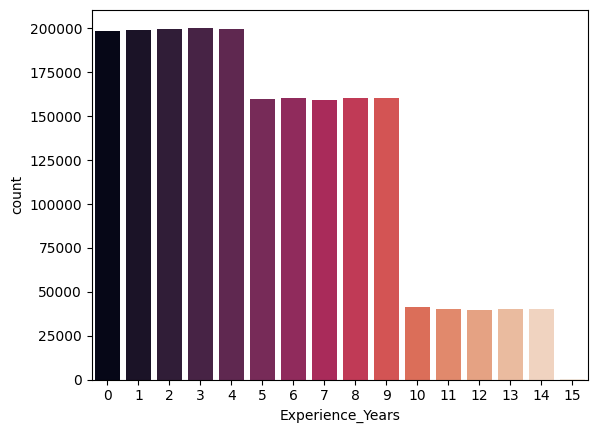

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot( x =  "Experience_Years" , data = data, palette= 'rocket', hue = 'Experience_Years', legend = False)
plt.show()
plt.tight_layout()

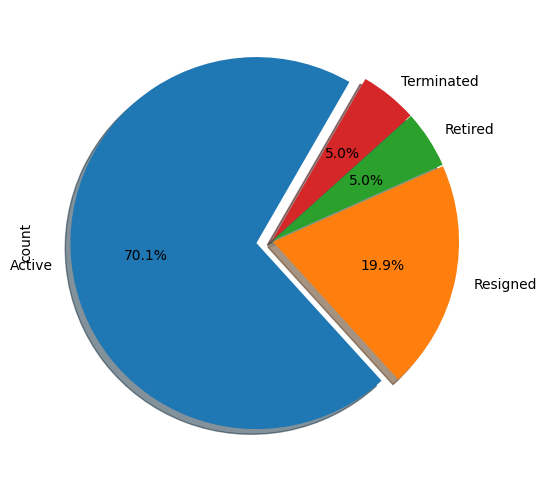

In [ ]:
data['Status'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', shadow = True, figsize=(6,8), color = sns.color_palette('rocket', 5), startangle = 60, explode = (0.08, 0.01, 0.01, 0.01))
plt.show()

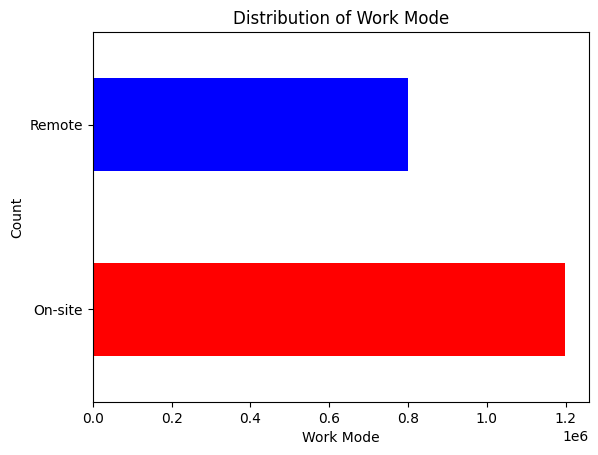

In [ ]:
data['Work_Mode'].value_counts().plot(kind = "barh" , color = ['red', 'blue'])
plt.title('Distribution of Work Mode')
plt.xlabel('Work Mode')
plt.ylabel('Count')
plt.show()

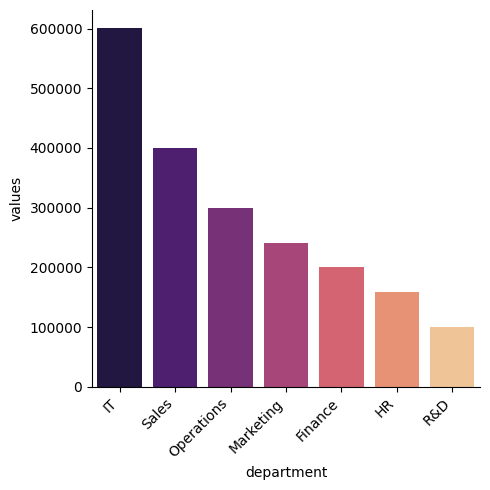

In [ ]:
department_counts = data['Department'].value_counts().reset_index()
department_counts.columns = ['department', 'values']
sns.catplot(x = 'department', y = 'values', kind = 'bar' , data = department_counts , palette='magma', hue = 'department', legend = False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

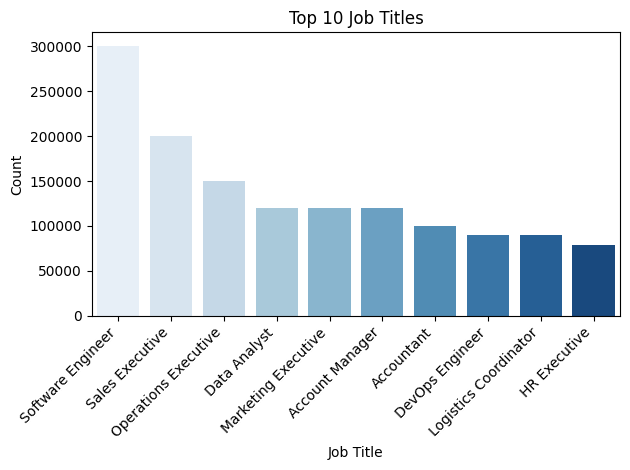

In [ ]:
job = data['Job_Title'].value_counts().head(10)
sns.barplot(x = job.index, y = job.values, palette = 'Blues', hue = job.index, legend = False)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

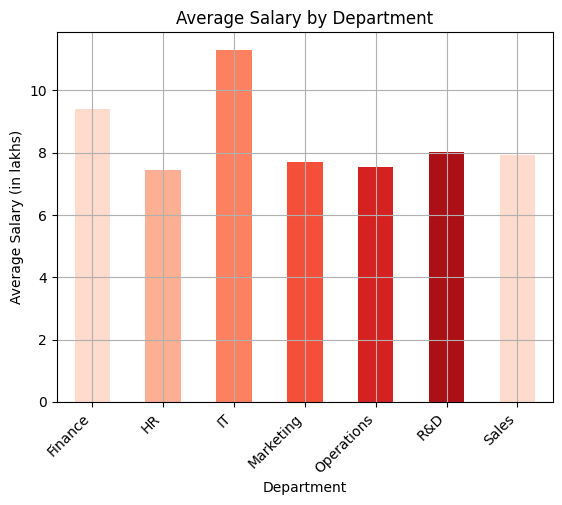

In [ ]:
dept =  data.groupby('Department')["Salary_INR"].mean()/100000
dept.plot(kind = 'bar', x = dept.index, y = dept.values, color = sns.color_palette('Reds'))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Department')
plt.ylabel('Average Salary (in lakhs)')
plt.title('Average Salary by Department')
plt.grid()
plt.show()

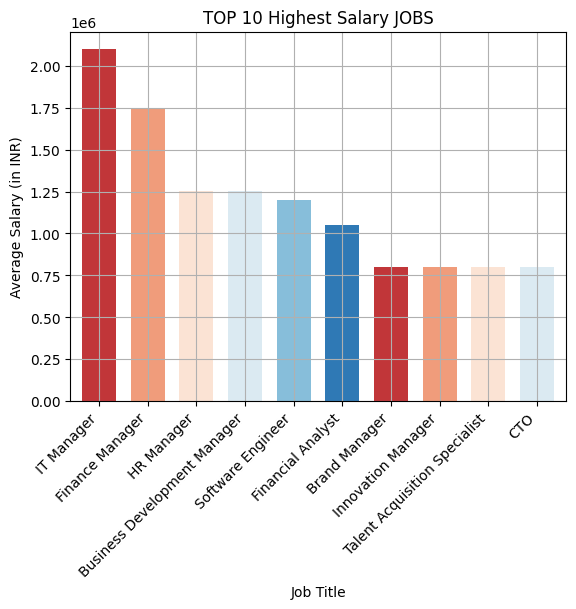

In [ ]:
job = data.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending = False).head(10)
job.plot(kind = 'bar', x = job.index, y = job.values, color = sns.color_palette('RdBu'), width = 0.7)
plt.xticks(rotation=45, ha='right')
plt.title('TOP 10 Highest Salary JOBS')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (in INR)')
plt.grid()
plt.show()

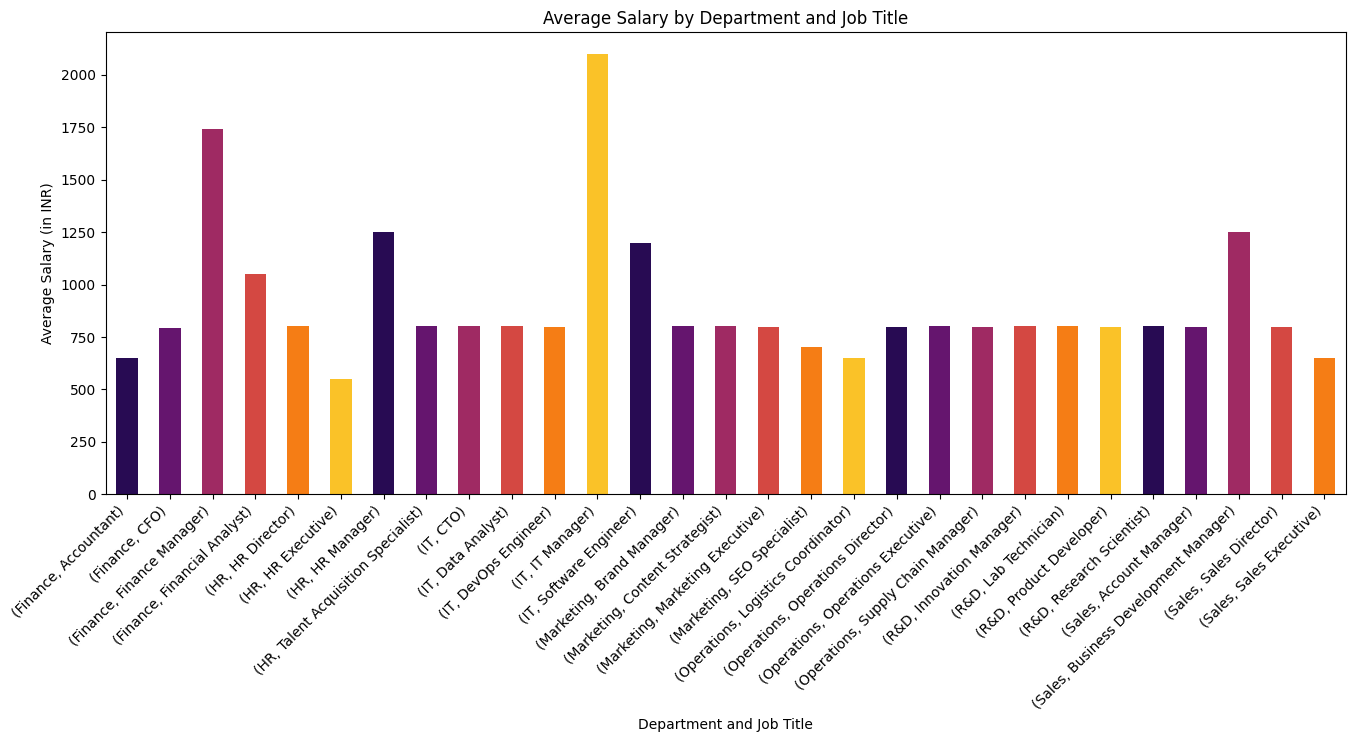

In [ ]:
df = data.groupby(['Department', 'Job_Title'])['Salary_INR'].mean()/1000
plt.figure(figsize=(16, 6))
df.plot(kind = 'bar', x = df.index, y = df, color = sns.color_palette('inferno'))
plt.xticks(rotation=45, ha='right')
plt.title('Average Salary by Department and Job Title')
plt.xlabel('Department and Job Title')
plt.ylabel('Average Salary (in INR)')
plt.show()

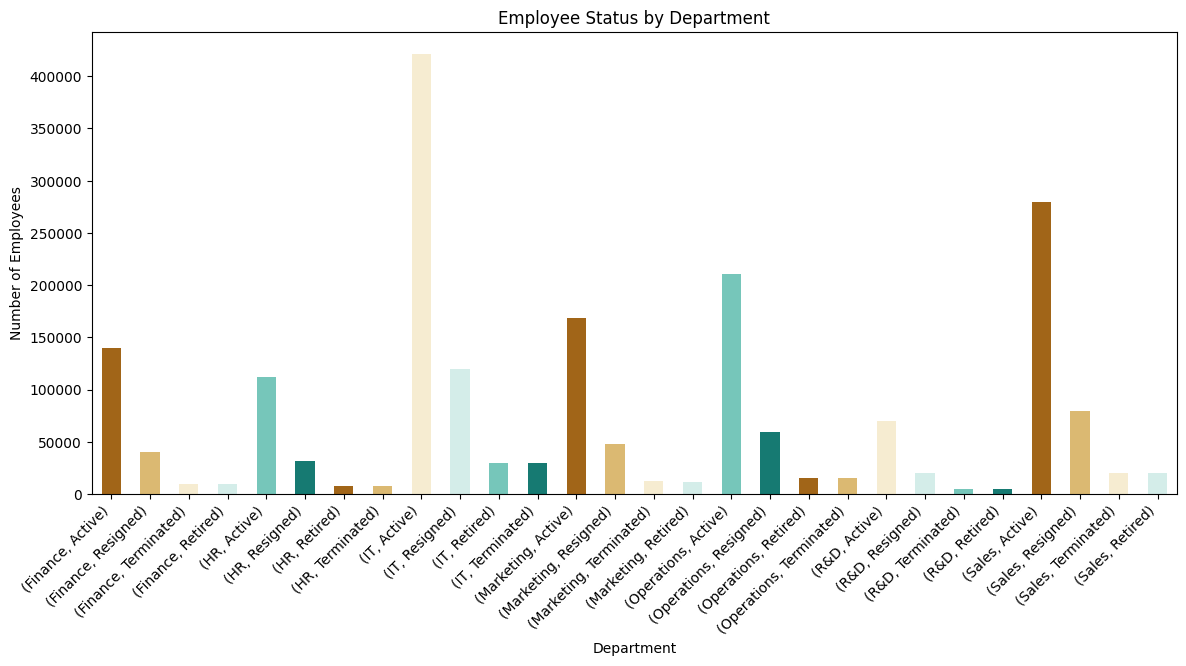

In [ ]:
data.groupby('Department')['Status'].value_counts().plot(kind= 'bar', color= sns.color_palette('BrBG'), figsize=(14,6))
plt.xticks(rotation = 45, ha = 'right')
plt.title('Employee Status by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
data[data['Status'] == 'Retired'].groupby('Department')['Status'].value_counts()

,,count
Department,Status,
Finance,Retired,9931
HR,Retired,7944
IT,Retired,29976
Marketing,Retired,11928
Operations,Retired,14996
R&D,Retired,4983
Sales,Retired,20154


In [ ]:
data[data['Status'] == 'Resigned'].groupby('Department')['Status'].value_counts()

,,count
Department,Status,
Finance,Resigned,40238
HR,Resigned,31736
IT,Resigned,119852
Marketing,Resigned,47793
Operations,Resigned,59397
R&D,Resigned,19919
Sales,Resigned,79725


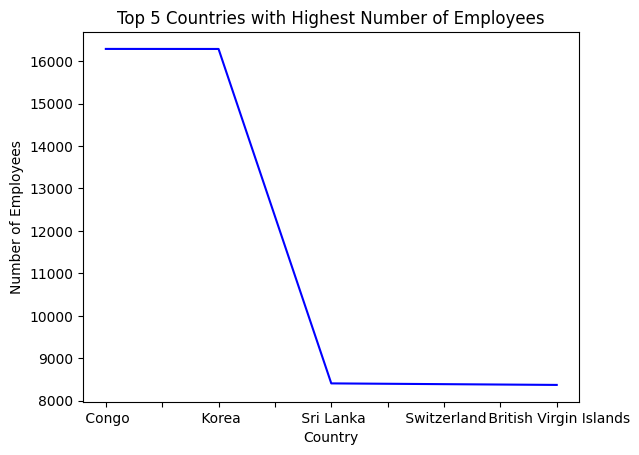

In [ ]:
data['Country'] = data['Location'].apply(lambda x : x.split(',')[1])
data['Country'].value_counts().head().plot(kind = 'line', color = ['blue'])
plt.title('Top 5 Countries with Highest Number of Employees')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.show()

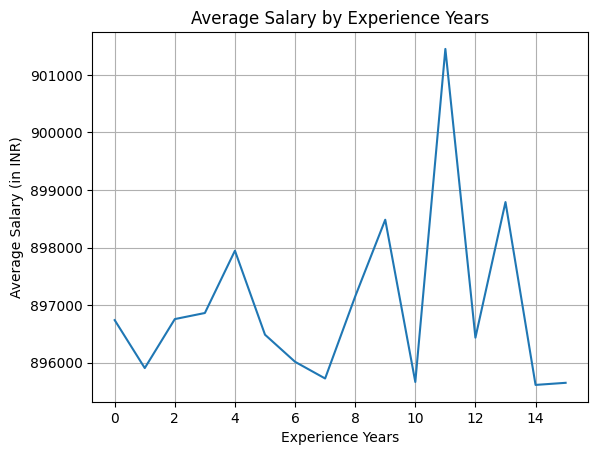

In [ ]:
data.groupby('Experience_Years')['Salary_INR'].mean().plot(kind='line')
plt.title('Average Salary by Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('Average Salary (in INR)')
plt.grid()
plt.show()


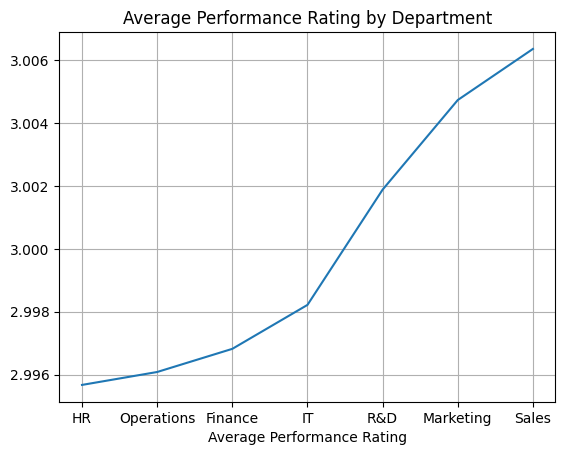

In [ ]:
data.groupby('Department')['Performance_Rating'].mean().sort_values(ascending=True).plot(kind = 'line')
plt.title('Average Performance Rating by Department')
plt.xlabel('Average Performance Rating')
plt.grid()
plt.show()

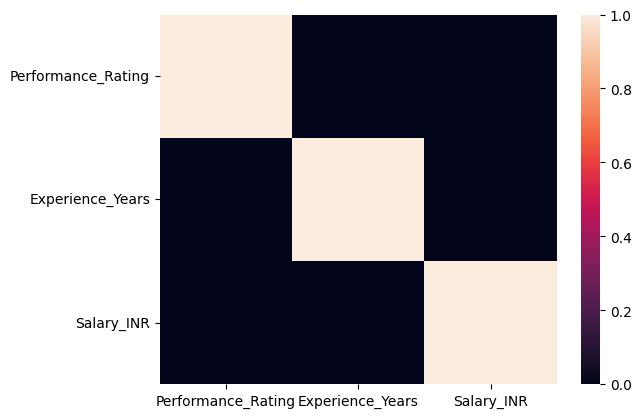

In [ ]:
df = data[['Performance_Rating', 'Experience_Years','Salary_INR']].corr()
sns.heatmap(df)
plt.show()

In [ ]:
data["Year"] = data['Hire_Date'].dt.year
data["Month"] = data['Hire_Date'].dt.month

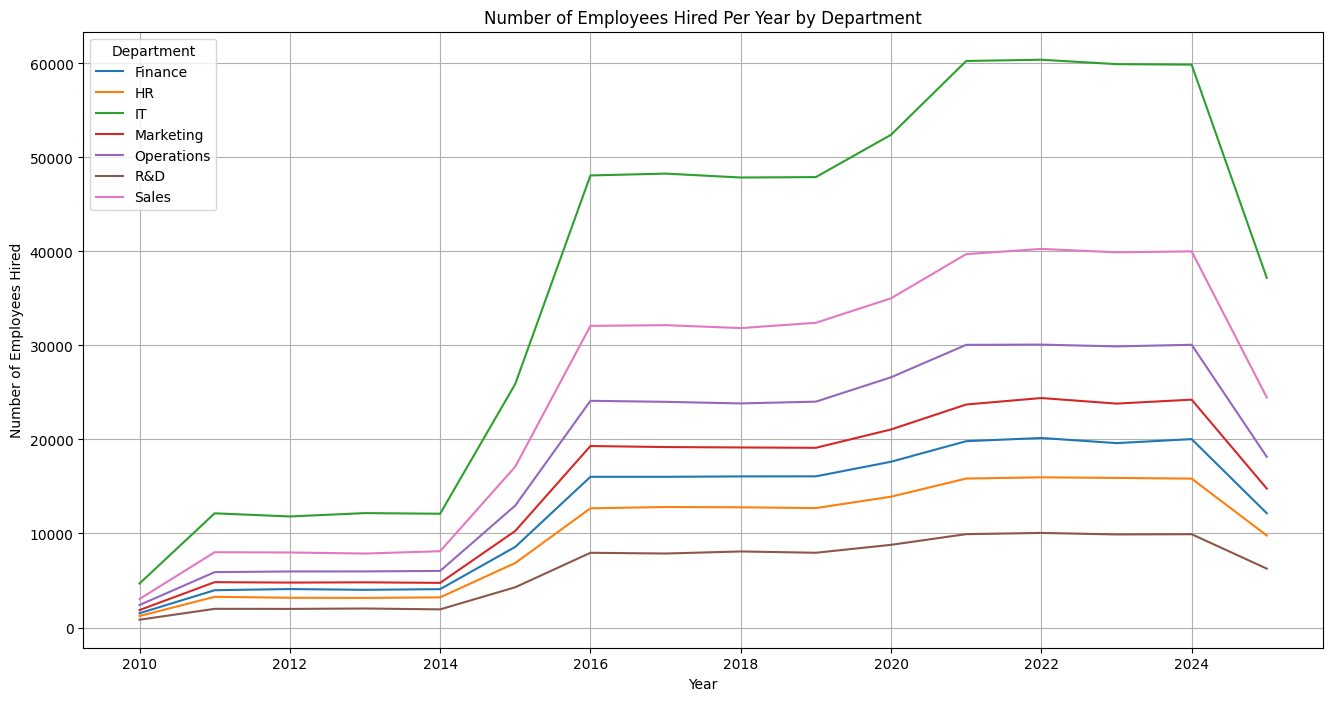

In [ ]:
data.groupby(['Year', 'Department']).size().unstack().plot(kind='line', figsize=(16, 8))
plt.title('Number of Employees Hired Per Year by Department')
plt.xlabel('Year')
plt.ylabel('Number of Employees Hired')
plt.legend(title='Departments')
plt.grid(True)
plt.show()

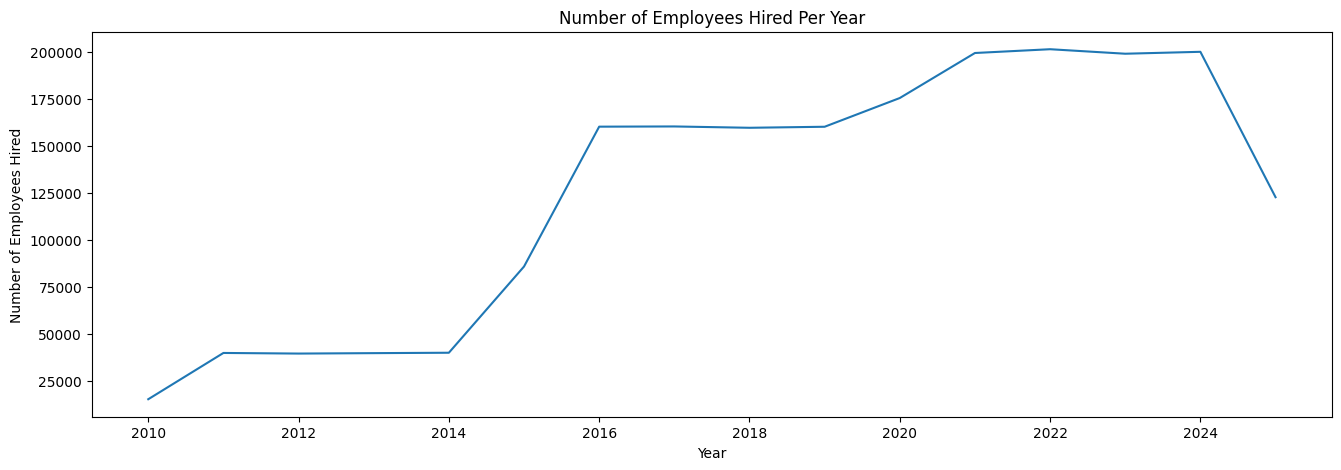

In [ ]:
data.groupby('Year')['Employee_ID'].count().plot(kind='line', figsize=(16, 5))
plt.title('Number of Employees Hired Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Employees Hired')
plt.show()

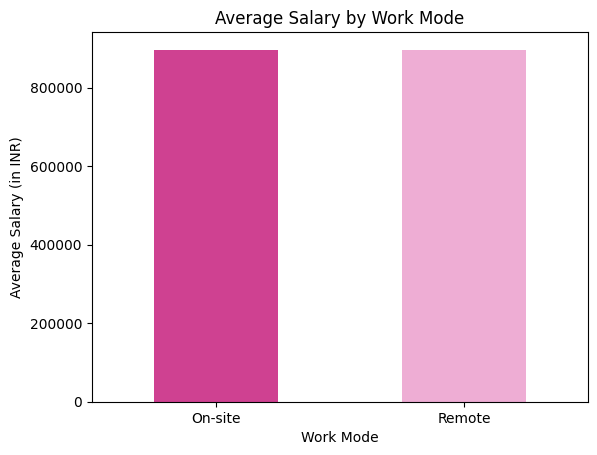

In [ ]:
data.groupby('Work_Mode')['Salary_INR'].mean().plot(kind = 'bar', color = sns.color_palette('PiYG'))
plt.title('Average Salary by Work Mode')
plt.xlabel('Work Mode')
plt.xticks(rotation = 0)
plt.ylabel('Average Salary (in INR)')
plt.show()

/tmp/ipython-input-454740104.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('Department').apply(lambda x: x.nlargest(10, 'Salary_INR')).plot(kind = 'bar', x = 'Department', y = 'Salary_INR', color = sns.color_palette('rocket'))


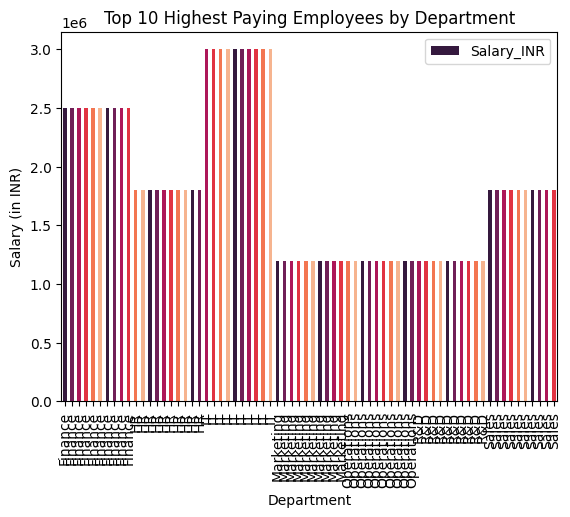

In [ ]:
data.groupby('Department').apply(lambda x: x.nlargest(10, 'Salary_INR')).plot(kind = 'bar', x = 'Department', y = 'Salary_INR', color = sns.color_palette('rocket'))
plt.title('Top 10 Highest Paying Employees by Department')
plt.xlabel('Department')
plt.ylabel('Salary (in INR)')
plt.show()

In [ ]:
def top_10_highest_salary_by_department(df):
  """
  Finds the top 10 employees with the highest salary in each department.

  Args:
    df: pandas DataFrame with employee data.

  Returns:
    DataFrame containing the top 10 employees by salary for each department.
  """
  return df.groupby('Department').apply(lambda x: x.nlargest(10, 'Salary_INR'))

top_earners_by_department = top_10_highest_salary_by_department(data)
display(top_earners_by_department)

/tmp/ipython-input-2956204484.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Department').apply(lambda x: x.nlargest(10, 'Salary_INR'))


Employee_ID           Full_Name Department  \
Department                                                      
Finance    888712   EMP0888713   Christopher Sloan    Finance   
           695808   EMP0695809        Todd Rodgers    Finance   
           459273   EMP0459274        Angela Payne    Finance   
           750893   EMP0750894           Nina Lara    Finance   
           780290   EMP0780291   Brittany Thompson    Finance   
...                        ...                 ...        ...   
Sales      86194    EMP0086195    Gabrielle Phelps      Sales   
           1116580  EMP1116581     Kimberly Mullen      Sales   
           1760918  EMP1760919  Christopher Farmer      Sales   
           1878661  EMP1878662    Margaret Gardner      Sales   
           1333220  EMP1333221      Benjamin Jones      Sales   

                                       Job_Title  Hire_Date  \
Department                                                    
Finance    888712                Finance Manager 2011-07-19   
           695808                Finance Manager 2019-12-27   
           459273                Finance Manager 2021-08-12   
           750893                Finance Manager 2021-10-19   
           780290                Finance Manager 2021-07-23   
...                                          ...        ...   
Sales      86194    Business Development Manager 2015-11-23   
           1116580  Business Development Manager 2025-01-09   
           1760918  Business Development Manager 2013-01-12   
           1878661  Business Development Manager 2025-04-23   
           1333220  Business Development Manager 2017-11-14   

                                                      Location  \
Department                                                       
Finance    888712                        East Ashley, Portugal   
           695808                          North Taylor, Ghana   
           459273                 South Ravenport, Isle of Man   
           750893            North Christopher, American Samoa   
           780290                 East Melissaside, Martinique   
...                                                        ...   
Sales      86194    New Michaelshire, Central African Republic   
           1116580                          Welchberg, Uruguay   
           1760918                         West Mark, Dominica   
           1878661                         Gentryburgh, Serbia   
           1333220                      East Marissa, Slovenia   

                    Performance_Rating  Experience_Years    Status Work_Mode  \
Department                                                                     
Finance    888712                    1                14    Active   On-site   
           695808                    1                 5    Active   On-site   
           459273                    5                 4    Active    Remote   
           750893                    4                 3    Active   On-site   
           780290                    1                 4    Active   On-site   
...                                ...               ...       ...       ...   
Sales      86194                     4                 9  Resigned    Remote   
           1116580                   3                 0  Resigned   On-site   
           1760918                   4                12   Retired   On-site   
           1878661                   1                 0    Active   On-site   
           1333220                   1                 7  Resigned    Remote   

                    Salary_INR                    Country  Year  Month  
Department                                                              
Finance    888712      2499958                   Portugal  2011      7  
           695808      2499929                      Ghana  2019     12  
           459273      2499925                Isle of Man  2021      8  
           750893      2499813             American Samoa  2021     10  
           7802

In [ ]:
dept_count = data.groupby('Department')['Status'].agg(total_emp = 'count', resigned = lambda x:(x=="Resigned").sum())
dept_count['attrition_rate'] = (dept_count['resigned']/dept_count['total_emp']) * 100
dept_count

,total_emp,resigned,attrition_rate
Department,,,
Finance,199873,40238,20.131784
HR,159119,31736,19.944821
IT,601042,119852,19.940703
Marketing,240081,47793,19.907031
Operations,300095,59397,19.792732
R&D,99759,19919,19.967121
Sales,400031,79725,19.929705


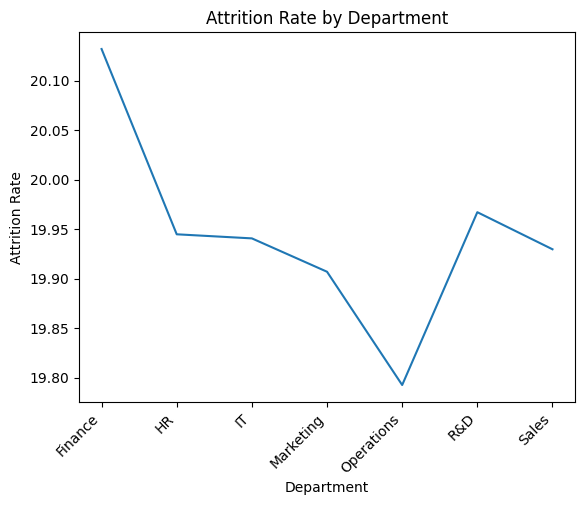

In [ ]:
dept_count['attrition_rate'].plot(kind = 'line')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45, ha='right')
plt.show()